In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Parsing and Chunking in Vertex AI Search: Featuring BYO Capabilities
<table align="left">
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-colab&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-colab&destination=vais_notebook-from_notebook-colab&url=https%3A%2F%2Fcolab.research.google.com%2Fgithub%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fparsing_and_chunking_with_BYO.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-colab_ent&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-colab_ent&destination=vais_notebook-from_notebook-colab_ent&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fcolab%2Fimport%2Fhttps%3A%252F%252Fraw.githubusercontent.com%252FGoogleCloudPlatform%252Fapplied-ai-engineering-samples%252Fmain%252Fgenai-on-vertex-ai%252Fvertex_ai_search%252Fparsing_and_chunking_with_BYO.ipynb"">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-vai_workbench&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-vai_workbench&destination=vais_notebook-from_notebook-vai_workbench&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fworkbench%2Fdeploy-notebook%3Fdownload_url%3Dhttps%3A%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fparsing_and_chunking_with_BYO.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-github&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-github&destination=vais_notebook-from_notebook-github&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fparsing_and_chunking_with_BYO.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|----------|-------------|
| Author(s)   | Jaival Desai, Hossein Mansour|
| Reviewers(s) | Allie Chen, Rajesh Thallam|
| Last updated | 2024-08-08: The first draft |

# Overview

In this notebook, we will demonstrate how to retrieve Parsed and Chunked documents from a [Vertex AI Search](https://cloud.google.com/generative-ai-app-builder/docs/introduction) (VAIS) datastore. Additionally, we will show how to Bring Your Own Chunks (BYOC) and ingest them into the datastore as needed. You can find more information [here](https://cloud.google.com/generative-ai-app-builder/docs/parse-chunk-documents#bring-parsed-document).

We will perform the following steps:

- [Prerequisite] Create a VAIS Datastore and import sample documents
- Get [Processed Document](https://cloud.google.com/generative-ai-app-builder/docs/parse-chunk-documents#get-parsed-documents) from datastore
- Get [Chunks](https://cloud.google.com/generative-ai-app-builder/docs/parse-chunk-documents#get-processed-chunks) from datastore
- Reconstruct the document from Chunks for visual inspection
- Store Chunks for offline review and/or edit
-[Bring your Own Chunks](https://cloud.google.com/generative-ai-app-builder/docs/parse-chunk-documents#bring-chunks). At the time of publishing this notebook, the BYOC feature is available under private preview. To be allowlisted for this feature, please contact your Google account team.

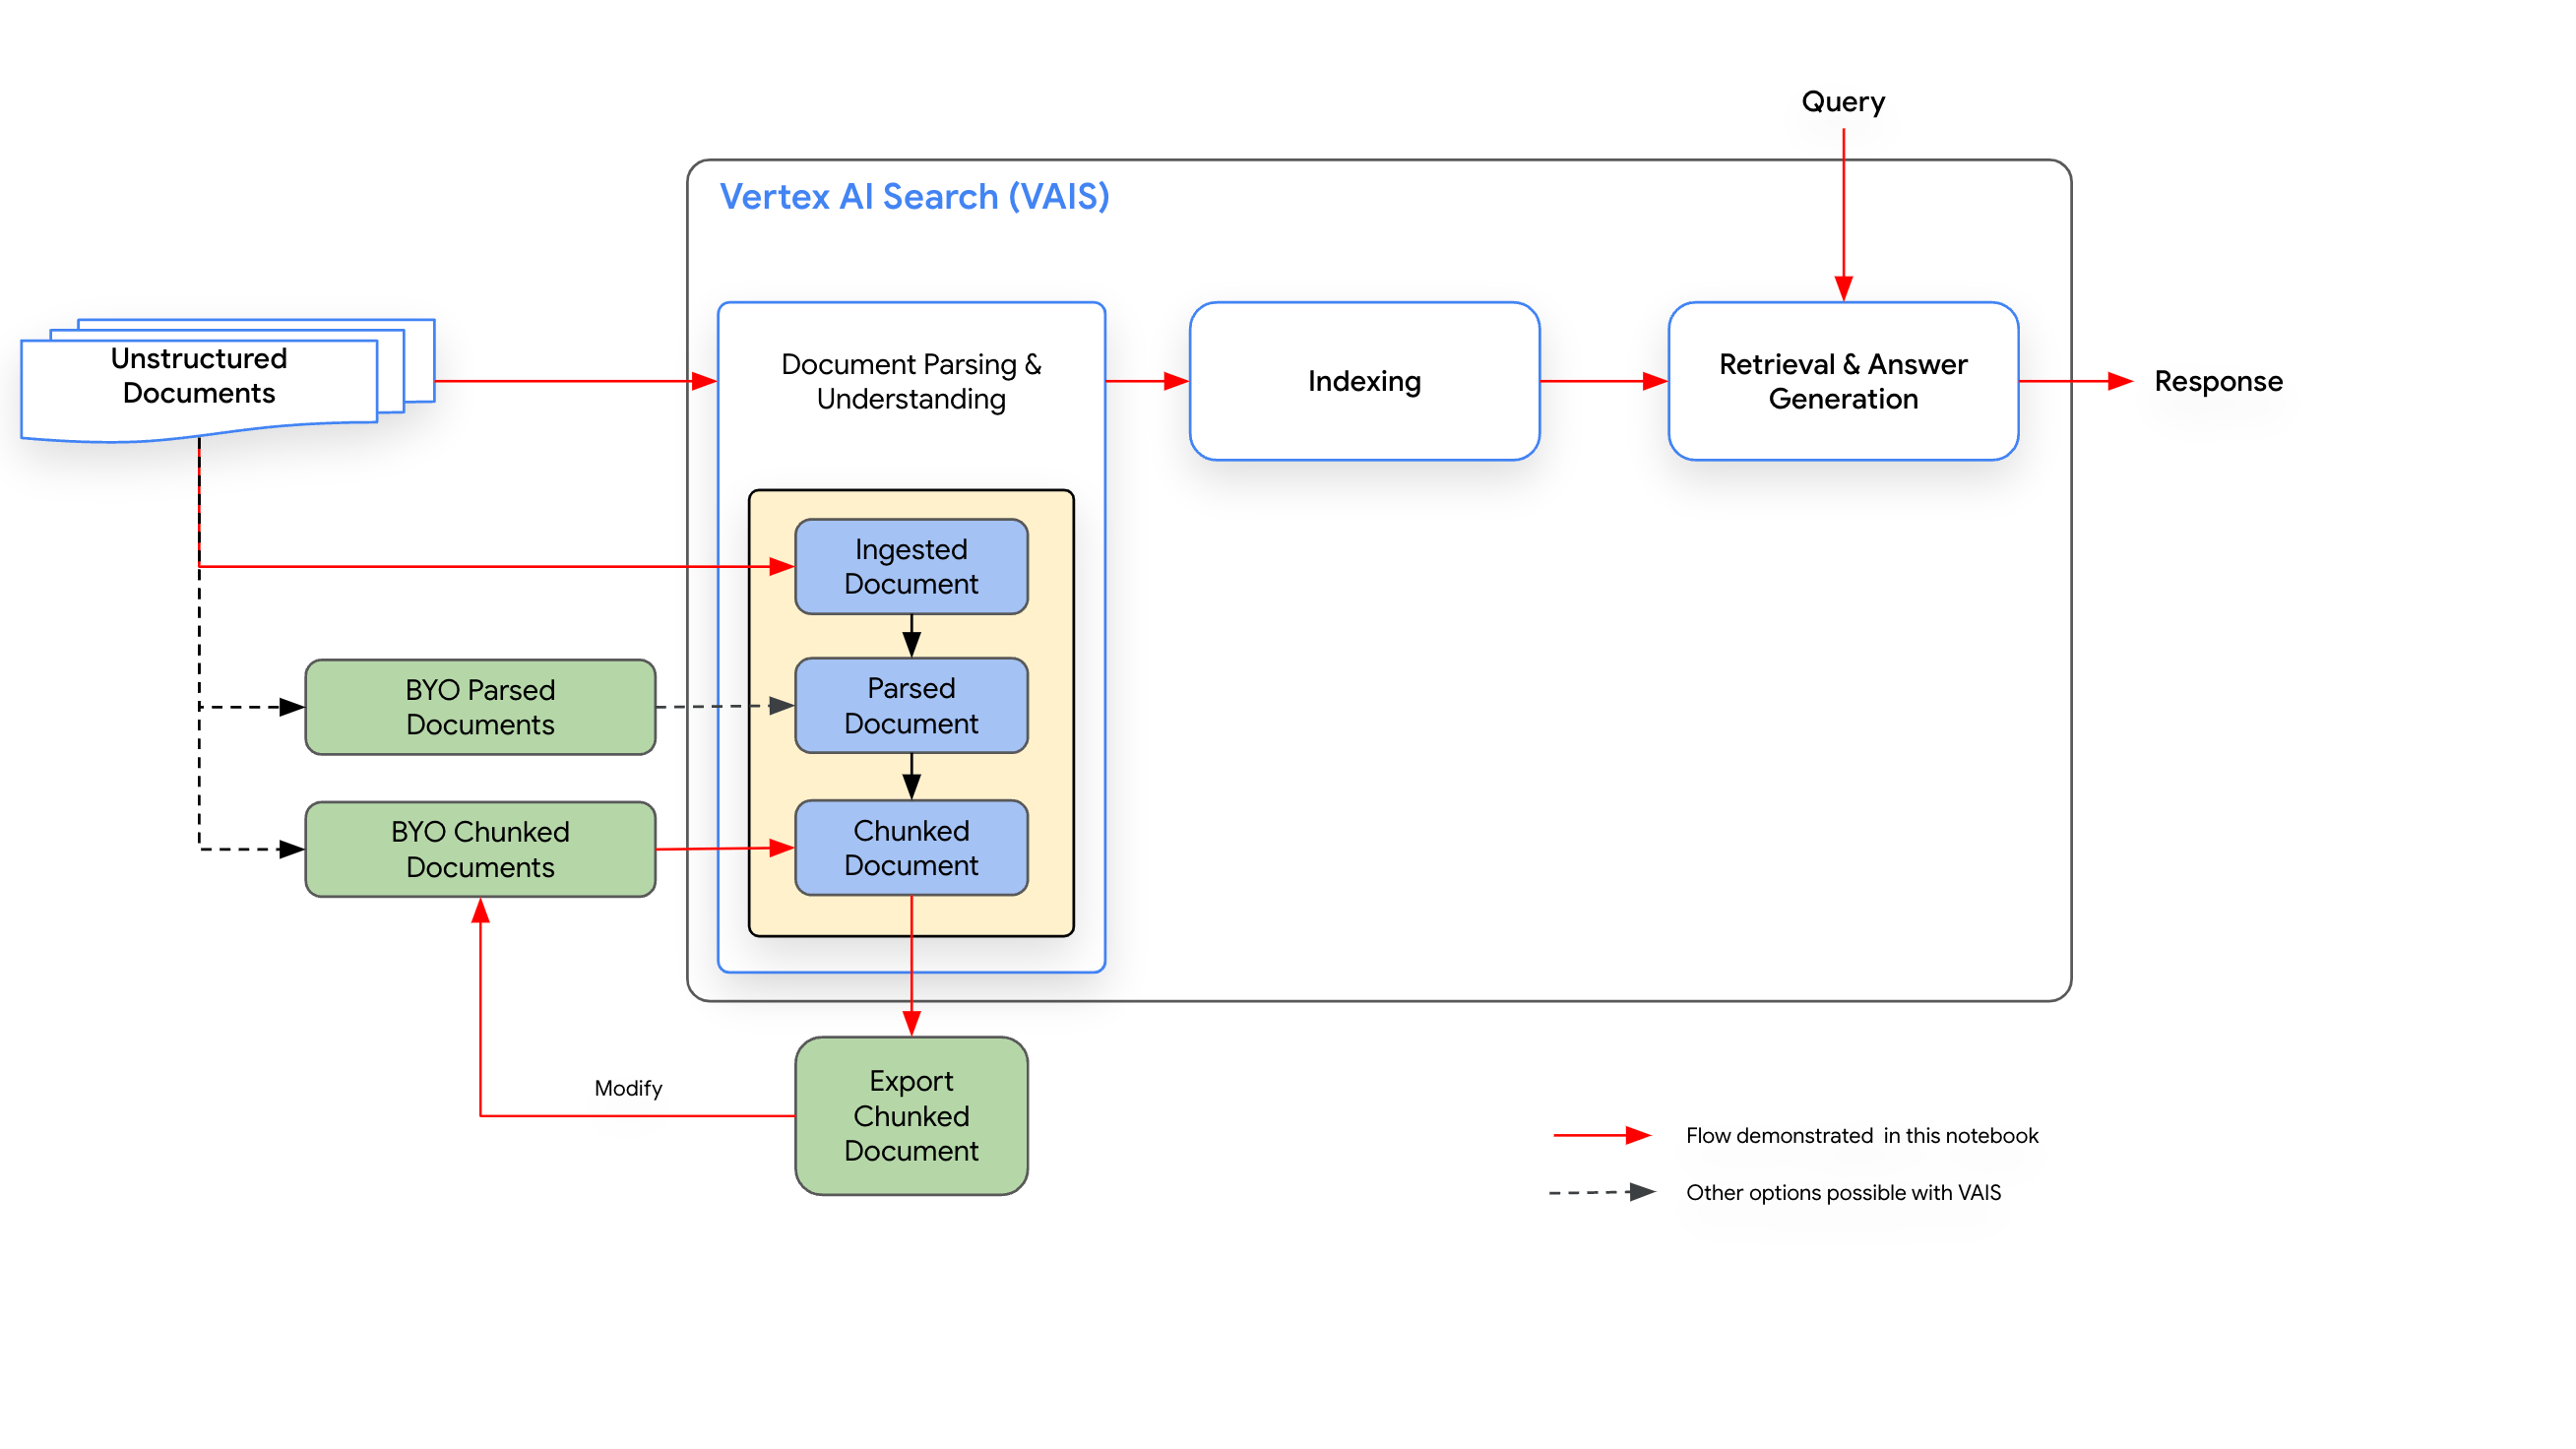

REST API is used throughout this notebook. Please consult the [official documentation](https://cloud.google.com/generative-ai-app-builder/docs/apis) for alternative ways to achieve the same goal, namely Client libraries and RPC.


# Vertex AI Search
Vertex AI Search (VAIS) is a fully-managed platform, powered by large language models, that lets you build AI-enabled search and recommendation experiences for your public or private websites or mobile applications

VAIS can handle a diverse set of data sources including structured, unstructured, and website data, as well as data from third-party applications such as Jira, Salesforce, and Confluence.

VAIS also has built-in integration with LLMs which enables you to provide answers to complex questions, grounded in your data

#Using this Notebook
If you're running outside of Colab, depending on your environment you may need to install pip packages that are included in the Colab environment by default but are not part of the Python Standard Library. Outside of Colab you'll also notice comments in code cells that look like #@something, these trigger special Colab functionality but don't change the behavior of the notebook.

This tutorial uses the following Google Cloud services and resources:

- Service Usage API
- Discovery Engine
- Google Cloud Storage Client

This notebook has been tested in the following environment:

- Python version = 3.10.12
- google.cloud.storage = 2.8.0
- google.auth = 2.27.0

# Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started)

## Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs
2. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project)
3. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
4. [Enable the Cloud Storage API](https://console.cloud.google.com/flows/enableapi?apiid=storage.googleapis.com)
5. [Enable the Discovery Engine API for your project](https://console.cloud.google.com/marketplace/product/google/discoveryengine.googleapis.com)

## Google Cloud Permissions

Ideally you should have [Owner role](https://cloud.google.com/iam/docs/understanding-roles) for your project to run this notebook. If that is not an option, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access)
- **`roles/serviceusage.serviceUsageAdmin`** to enable APIs
- **`roles/iam.serviceAccountAdmin`** to modify service agent permissions
- **`roles/discoveryengine.admin`** to modify discoveryengine assets
- **`roles/storage.objectAdmin`** to modify and delete GCS buckets

#Setup Environment

## Authentication

 If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). In many cases, running `gcloud auth application-default login` in a shell on the machine running the notebook kernel is sufficient.

More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [ ]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()
    print("Authenticated")

In [ ]:
from google.auth import default
from google.auth.transport.requests import AuthorizedSession

creds, _ = default()
authed_session = AuthorizedSession(creds)

## Import Libraries

In [ ]:
import sys
import time
import os
import json
import glob
import re
import textwrap
import subprocess
from typing import Dict, Any, List, Tuple
from urllib.parse import urlparse
from io import BytesIO

import requests
import pandas as pd
from google.cloud import storage
from google.auth import default
from google.auth.transport.requests import AuthorizedSession

## Configure environment

You can enter the ID for an existing Vertex AI Search App and Datastore to be used in this notebook.

Alternatively, you can enter the desired IDs for non-existings App and Datastore and they will be created later in this notebook.

Same applies to the Cloud Storage buckets to store Documents and Metadata. The Documents and Metadata can be in separate buckets, but it is advised to keep them (together with the JSONL created later in this notebook) in the same temporary bucket for the ease of cleanup.

You can find more information regarding the `location` of datastores and associated limitations [here](https://cloud.google.com/generative-ai-app-builder/docs/locations#specify_a_multi-region_for_your_data_store).

The location of a Datastore is set at the time of creation and it should be called appropriately to query the Datastore.

`FILE_NAME_VAIS_OUTPUT` is used to upload the Chunked Document to the bucket specified.

In [ ]:
PROJECT_ID = ""  # @param {type:"string"}

# Vertex AI Search Parameters
DATASTORE_ID = "goog_earnings_test"  # @param {type:"string"}
LOCATION = "global"  # @param ["global", "us", "eu"] Global is preferred
GCS_BUCKET = 'sample_earnings' # @param {type:"string"}
FILE_NAME_VAIS_OUTPUT = 'chunked_doc_from_VAIS.json' # @param {type:"string"}

# STEP 1. Create VAIS Datastore

You can skip this section if you already have a datastore with your target unstructured documents ingested with [Chunk mode](https://cloud.google.com/generative-ai-app-builder/docs/parse-chunk-documents), which indexes your data as chunks to improve relevance and decrease computational load for LLMs.

## Helper functions to create a Datastore

The datastore is created with [Chunk Mode](https://cloud.google.com/generative-ai-app-builder/docs/parse-chunk-documents) and Chunk size of 500 tokens.

The documents will be processed with Layout parser (higher quality for complex documents containing elements like tables and lists) and Ancestor information (i.e. headings) is included with each Chunk. Please see [official documentation](https://cloud.google.com/generative-ai-app-builder/docs/parse-chunk-documents) for more details.

In [ ]:
def create_chunk_mode_datastore(project_id: str, location: str, datastore_id: str) -> int:
    """Create a datastore with chunk mode and the more advanced layout parser"""
    payload = {
        "displayName": datastore_id,
        "industryVertical": "GENERIC",
        "solutionTypes": ["SOLUTION_TYPE_SEARCH"],
        "contentConfig": "CONTENT_REQUIRED",
        "documentProcessingConfig": {
            "chunkingConfig": {
                "layoutBasedChunkingConfig": {
                    "chunkSize": 500,
                    "includeAncestorHeadings": True,
                }
            },
            "defaultParsingConfig": {
                "layoutParsingConfig": {}
            }
        }
    }
    header = {"X-Goog-User-Project": project_id, "Content-Type": "application/json"}
    es_endpoint = f"https://discoveryengine.googleapis.com/v1/projects/{project_id}/locations/{location}/collections/default_collection/dataStores?dataStoreId={datastore_id}"
    response = authed_session.post(es_endpoint, data=json.dumps(payload), headers=header)
    if response.status_code == 200:
        print(f"The creation of Datastore {datastore_id} is initiated.")
        print("It may take a few minutes for the Datastore to become available")
    else:
        print(f"Failed to create Datastore {datastore_id}")
        print(response.json())
    return response.status_code

## Helper functions to issue basic search on a Datastore

In [ ]:
def search_by_datastore(project_id: str, location: str, datastore_id: str, query: str) -> requests.Response:
    """Searches a datastore using the provided query."""
    response = authed_session.post(
        f'https://discoveryengine.googleapis.com/v1/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{datastore_id}/servingConfigs/default_search:search',
        headers={
            'Content-Type': 'application/json',
        },
        json={
            "query": query,
            "pageSize": 1
        },
    )
    return response

## Helper functions to check whether or not a Datastore already exists

In [ ]:
def datastore_exists(project_id: str, location: str, datastore_id: str) -> bool:
    """Check if a datastore exists."""
    response = search_by_datastore(project_id, location, datastore_id, "test")
    status_code = response.status_code
    if status_code == 200:
        return True
    if status_code == 404:
        return False
    raise Exception(f"Error: {status_code}")

## Create a Datastore with the provided ID if it doesn't exist

In [ ]:
# Create Chunk mode Datastore if it doesn't exist
if datastore_exists(PROJECT_ID, LOCATION, DATASTORE_ID):
    print(f"Datastore {DATASTORE_ID} already exists.")
else:
    create_chunk_mode_datastore(PROJECT_ID, LOCATION, DATASTORE_ID)

## [Optional] Check if the Datastore is created successfully


The Datastore is polled to track when it becomes available.

This may take a few minutes after the datastore creation is initiated

In [ ]:
while not datastore_exists(PROJECT_ID, LOCATION, DATASTORE_ID):
    print(f"Datastore {DATASTORE_ID} is still being created.")
    time.sleep(30)
print(f"Datastore {DATASTORE_ID} is created successfully.")

# STEP 2. Import sample document into VAIS Datastore

## Create a GCS bucket with sample document(s)

This step is only needed for the purpose of this demo. For the real use case you will need to upload your actual documents to a GCS bucket

Here, we download [Alphabet's 2024 Q2 Earnings Release](https://abc.xyz/assets/19/e4/3dc1d4d6439c81206370167db1bd/2024q2-alphabet-earnings-release.pdf) as a sample document.

In [ ]:
def create_gcs_bucket_and_download_files(project_id: str, bucket_name: str, file_urls: List[str]) -> None:
    """
    Creates a GCS bucket (if it doesn't exist) and downloads files from specified URLs.

    Args:
        project_id (str): Your Google Cloud Project ID.
        bucket_name (str): The name of the GCS bucket (e.g., "my-documents-bucket").
        file_urls (list): A list of URLs to files you want to download.
    """

    storage_client = storage.Client(project=project_id)
    bucket = storage_client.bucket(bucket_name)

    if not bucket.exists():
        bucket = storage_client.create_bucket(bucket_name)

        print(f"Bucket {bucket_name} created.")


    for url in file_urls:
        file_name = url.split("/")[-1]
        print(f"Downloading: {file_name}")

        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an exception for HTTP errors

            blob = bucket.blob(file_name)
            blob.upload_from_string(
                response.content,
                content_type='application/pdf'  # Explicitly set the content type
            )
            print(f"Uploaded: {file_name}")
        except requests.exceptions.RequestException as e:
            print(f"Error downloading {file_name}: {e}")


file_urls = [
    "https://abc.xyz/assets/19/e4/3dc1d4d6439c81206370167db1bd/2024q2-alphabet-earnings-release.pdf"
]

create_gcs_bucket_and_download_files(PROJECT_ID, GCS_BUCKET, file_urls)

## Helper function to import documents into a VAIS Datastroe

This helper function is used to import the documents in a GCS folder into VAIS

NOTE: The ["dataSchema"](https://cloud.google.com/generative-ai-app-builder/docs/reference/rest/v1/GcsSource?hl=en) should be specified as "content". This allows us to ingest PDF files directly. The default "dataSchema" is "document" which expects JSONL files(s) in `gcs_uri`. This option is most useful when we want to include Metadata. See [documentation](https://cloud.google.com/generative-ai-app-builder/docs/prepare-data?hl=en#storage-unstructured) for more details.

The process is done asynchronously, and the request returns an instance of a "Long running Operation".

For a small corpus like the one we are experimenting with in this notebook, the process takes in the order of xx minutes.

In [ ]:
def import_documents_from_gcs(project_id: str, location: str, datastore_id: str, gcs_uri: str) -> str:
    """Imports unstructured documents from a GCS bucket."""
    payload = {
        "reconciliationMode": "INCREMENTAL",
        "gcsSource": {"inputUris": [gcs_uri],
                      "dataSchema": "content"},
    }
    header = {"Content-Type": "application/json"}
    es_endpoint = f"https://discoveryengine.googleapis.com/v1/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{datastore_id}/branches/default_branch/documents:import"
    response = authed_session.post(es_endpoint, data=json.dumps(payload), headers=header)
    print(f"--{response.json()}")
    return response.json()["name"]

## Importing sample documents into the Chunk Mode Datastore

In [ ]:
chunk_mode_import_lro = import_documents_from_gcs(
    project_id=PROJECT_ID,
    location=LOCATION,
    datastore_id=DATASTORE_ID,
    gcs_uri=f'gs://{GCS_BUCKET}/*',
)

## [Optional] Check the status of document import for the Chunk Mode Datastore
Optionally check the status of the long running operation for the import job. You can check this in the UI as well by looking at the "activity" tab of the corresponding Datastore

In [ ]:
while True:
    response = authed_session.get(
        f"https://discoveryengine.googleapis.com/v1/{chunk_mode_import_lro}",
    )
    try:
        status = response.json()["done"]
        if status:
            print(f"Import completed!")
            break
    except KeyError:
        print(f"Import in progress.")
        time.sleep(60)

#Helper Functions for formatting and ease of visual inspection
The following helper functions are used to reconstruct a document from its chunks and to show them in a human-friendly manner.

These functions are not particularly related to VAIS and you do not need to worry about their details to understand the flow of this notebook

##Helper function to beautify JSON outputs

In [ ]:
def parse_and_print_json(data: Dict[str, Any]) -> Dict[str, Any] | None:
    """
    Recursively parses and structures JSON data into a more readable dictionary format,
    handling nested dictionaries.

    Args:
        data (dict): The dictionary potentially containing JSON strings at any level.

    Returns:
        dict or None: The original dictionary with JSON strings parsed into dictionaries,
                or None if there's an error during JSON decoding.
    """

    for key, value in data.items():
        if isinstance(value, str) and value.startswith('{'):  # Check for JSON string
            try:
                data[key] = json.loads(value)  # Parse and replace with the parsed dictionary
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in key '{key}': {e}")
                return None
        elif isinstance(value, dict):  # Recurse into nested dictionaries
            result = parse_and_print_json(value)
            if result is None:  # If an error occurred during recursion, propagate it
                return None

    return data

def print_json(data: Dict[str, Any]) -> Dict[str, Any]:
    """
    Structures the JSON data into a more readable dictionary format

    Args:
        data (dict): The parsed JSON data as a dictionary.

    Returns:
        dict: The structured JSON data
    """
    output = {}

    for key, value in data.items():
        if isinstance(value, dict):
            output[key] = print_json(value)
        elif isinstance(value, list):
            output[key] = [
                print_json(item) if isinstance(item, dict) else item for item in value
            ]
        else:
            output[key] = value

    return output


##Helper function to reconstruct a document from chunks

Stitch chunks together to reconstruct the document while including pointers for chunk start and end.

In [ ]:
def reconstruct_document(chunked_document: Dict[str, Any]) -> str:
    """Reconstructs a document from its chunks."""
    reconstructed_document = ""
    for chunk in chunked_document['jsonData']['chunks']:
      reconstructed_document += "Start of chunk: " + chunk["id"] + "\n\n"
      reconstructed_document += chunk["content"]
      reconstructed_document += "\n\nEnd of chunk: " + chunk["id"] + "\n\n"

    return reconstructed_document

## Helper function to beautify a Markdown Table

Takes the markdown table from chunks and makes it more human readable using appropriate column widths using pipes and horizontal separators.

In [ ]:
def format_markdown_table(table: str, max_cell_width: int = 15) -> str:
    """Formats a poorly formatted Markdown table with aligned pipes, horizontal separators, and cell value wrapping.

    Args:
        table: A string containing the poorly formatted Markdown table.
        max_cell_width: The maximum allowed width for each cell.

    Returns:
        A string containing the nicely formatted Markdown table with wrapped cell values.
    """

    # Split the table into rows.
    rows = table.strip().split('\n')

    # Find the actual header row (skipping rows with only hyphens)
    header_row_index = next(
        (i for i, row in enumerate(rows) if not all(cell.strip() == '-' for cell in row.strip().split('|')[1:-1])),
        0  # Default to the first row if no suitable header is found
    )

    # Split each row into cells, ensuring empty cells are accounted for
    cells_per_row = [
        [cell.strip() for cell in row.strip().split('|')[1:-1]]  # Remove leading and trailing pipes before splitting
        for row in rows
    ]

    # Determine the number of columns, considering both header and data rows
    num_columns = max(len(row) for row in cells_per_row)

    # Determine the maximum width of each column, considering the max_cell_width limit.
    column_widths = [
        min(
            max(len(cells_per_row[row_index][col_index])
                for row_index in range(len(cells_per_row))
                if col_index < len(cells_per_row[row_index])),  # Handle rows with fewer columns
            max_cell_width
        )
        for col_index in range(num_columns)
    ]

    # Function to wrap cell values if they exceed the column width
    def wrap_cell_value(cell_value, width):
        wrapped_lines = textwrap.wrap(cell_value, width=width)
        return wrapped_lines

    # Format the header row, potentially adding empty cells if needed
    formatted_header_cells = [wrap_cell_value(cell, column_widths[i]) for i, cell in enumerate(cells_per_row[header_row_index])]
    formatted_header_cells += [['']] * (num_columns - len(formatted_header_cells))  # Add empty cells if needed
    max_lines_in_header = max(len(lines) for lines in formatted_header_cells)
    formatted_header_rows = []
    for line_index in range(max_lines_in_header):
        formatted_header_rows.append('| ' + ' | '.join(
            (cell[line_index] if line_index < len(cell) else '') + ' ' * (column_widths[i] - len(cell[line_index] if line_index < len(cell) else ''))
            for i, cell in enumerate(formatted_header_cells)) + ' |')

    formatted_rows = formatted_header_rows

    # Format the separator row beneath the header.
    formatted_rows.append('|' + '|'.join(
        '-' * (width + 2) for width in column_widths) + '|')

    # Format the remaining rows (excluding the hyphen-only row if present), adding separators after each row
    for row_index, row in enumerate(cells_per_row):
        if row_index != header_row_index and not all(cell.strip() == '-' for cell in row):  # Skip header and hyphen-only rows
            # Pad row with empty cells if needed
            padded_row = row + [''] * (num_columns - len(row))
            wrapped_cells = [wrap_cell_value(cell, column_widths[i]) for i, cell in enumerate(padded_row)]
            max_lines_in_row = max(len(lines) for lines in wrapped_cells)
            for line_index in range(max_lines_in_row):
                formatted_row = '| ' + ' | '.join(
                    (cell[line_index] if line_index < len(cell) else '') + ' ' * (column_widths[i] - len(cell[line_index] if line_index < len(cell) else ''))
                    for i, cell in enumerate(wrapped_cells)) + ' |'
                formatted_rows.append(formatted_row)

            # Add separator row after each data row (except the last one)
            if row_index < len(cells_per_row) - 1:
                formatted_rows.append('|' + '|'.join(
                    '-' * (width + 2) for width in column_widths) + '|')

    # Join the formatted rows into a single string.
    return '\n'.join(formatted_rows)

## Helper function to beautify all Markdown Tables

This function goes over the whole reconstructed document and replaces all markdown tables with their beautified versions

In [ ]:
def format_chunked_document(text: str) -> str:
    """Identifies markdown tables within a string, formats them, and replaces the original instances.

    Args:
        text: The input string potentially containing multiple markdown tables.

    Returns:
        The modified string with formatted markdown tables replacing the original ones.
    """

    # Define the pattern to match markdown table instances
    table_pattern = r"_START_OF_TABLE_\nTABLE_IN_MARKDOWN:\n(.*?)\n_END_OF_TABLE_"

    # Find all matches of the pattern within the text
    matches = re.findall(table_pattern, text, re.DOTALL)  # re.DOTALL allows '.' to match newlines

    # Process each matched table and replace it in the original text
    for table_content in matches:
        formatted_table = format_markdown_table(table_content)
        # Remove the extra newline before inserting the formatted table
        text = text.replace(f"_START_OF_TABLE_\nTABLE_IN_MARKDOWN:\n{table_content}\n_END_OF_TABLE_", "\n" + formatted_table + "\n\n", 1)

    return text




# STEP 3. Get Parsed and Chunked Document

In this section we visually review Parsed and Chunked versions of a document

##List all documents in a Datastore
Get a list of all documents in the datastore. You can then select the ID for the document of interest.

In [ ]:
def list_documents_datastore(project_id: str, location: str, data_store_id: str) -> List[Dict[str, str]] | None:
    """Lists documents in a specified data store using the REST API.

    Args:
        project_id: The ID of your Google Cloud project.
        location: The location of your data store.
              Values: "global", "us", "eu"
        data_store_id: The ID of the datastore.

    Returns:
        The JSON response containing the list of documents, or None if an error occurs.
    """

    base_url = f"{location}-discoveryengine.googleapis.com" if location != "global" else "discoveryengine.googleapis.com"
    url = f"https://{base_url}/v1alpha/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{data_store_id}/branches/default_branch/documents"

    try:
        # Assuming 'authed_session' is available and properly configured for authentication
        response = authed_session.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        documents = response.json()
        print(f"Successfully retrieved {len(documents.get('documents', []))} document(s).\n")
        return [{'id': document['id'], 'uri': document['content']['uri']}
 for document in documents.get('documents', [])]

    except requests.exceptions.RequestException as e:
        print(f"Error listing documents: {e}")
        return None

list_documents_datastore(PROJECT_ID, LOCATION, DATASTORE_ID)
DOCUMENT_ID = list_documents_datastore(PROJECT_ID, LOCATION, DATASTORE_ID)[0]['id'] # provisionally take the first document in the datastore as the document we want to analyze

##Select the Document of interest
By runnng the previous block, the Document ID of interest will be pre-set to the first document in the Datastore.

You can update as needed.



In [ ]:
DOCUMENT_ID = "" # @param {type:"string"}

## Get the Parsed Document

Get the parsed version of the document of interest.

The parsed document is not really human readable. However it might be useful to troubleshoot downstream issues such as text element identification or cell block detection.


In [ ]:
def get_parsed_document(project_id: str, data_store_id: str, document_id: str) -> Dict[str, Any] | None:
    """Retrieves a parsed document in JSON from Vertex AI Agent Builder."""
    """Only applicable for data stores with Chunking config set."""

    # Get authentication token (replace with your method)
    access_token = creds.token  # Use gcloud or service account

    base_url = "https://discoveryengine.googleapis.com/v1alpha"
    url = f"{base_url}/projects/{project_id}/locations/global/collections/default_collection/dataStores/{data_store_id}/branches/0/documents/{document_id}:getProcessedDocument?processed_document_type=PARSED_DOCUMENT"
    response = authed_session.get(url)

    if response.status_code == 200:
        parsed_document = parse_and_print_json(response.json())
        return parsed_document
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

parsed_document = get_parsed_document(PROJECT_ID, DATASTORE_ID, DOCUMENT_ID)
parsed_document

##Get the Chunked Document

Get Chunks from the document in JSON format

In [ ]:
def get_chunked_document(project_id: str, data_store_id: str, document_id: str) -> Dict[str, Any] | None:
    """Retrieves a chunked document in JSON from Vertex AI Agent Builder."""
    """Only applicable for data stores with Chunking config set."""

    # Get authentication token (replace with your method)
    access_token = creds.token  # Use gcloud or service account

    base_url = "https://discoveryengine.googleapis.com/v1alpha"
    url = f"{base_url}/projects/{project_id}/locations/global/collections/default_collection/dataStores/{data_store_id}/branches/0/documents/{document_id}:getProcessedDocument?processed_document_type=CHUNKED_DOCUMENT"
    response = authed_session.get(url)

    if response.status_code == 200:
        chunked_document = parse_and_print_json(response.json())
        return chunked_document
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

chunked_document = get_chunked_document(PROJECT_ID, DATASTORE_ID, DOCUMENT_ID)
chunked_document

## Visually reviewing Chunked document

Visually review to spot issues with the chunked document.

Helper functions defined earlier in this notebook are used here.

The chunks from JSON object are stacked together first, and beautified later for ease of human reviewing.



An example for a beautified chunked document

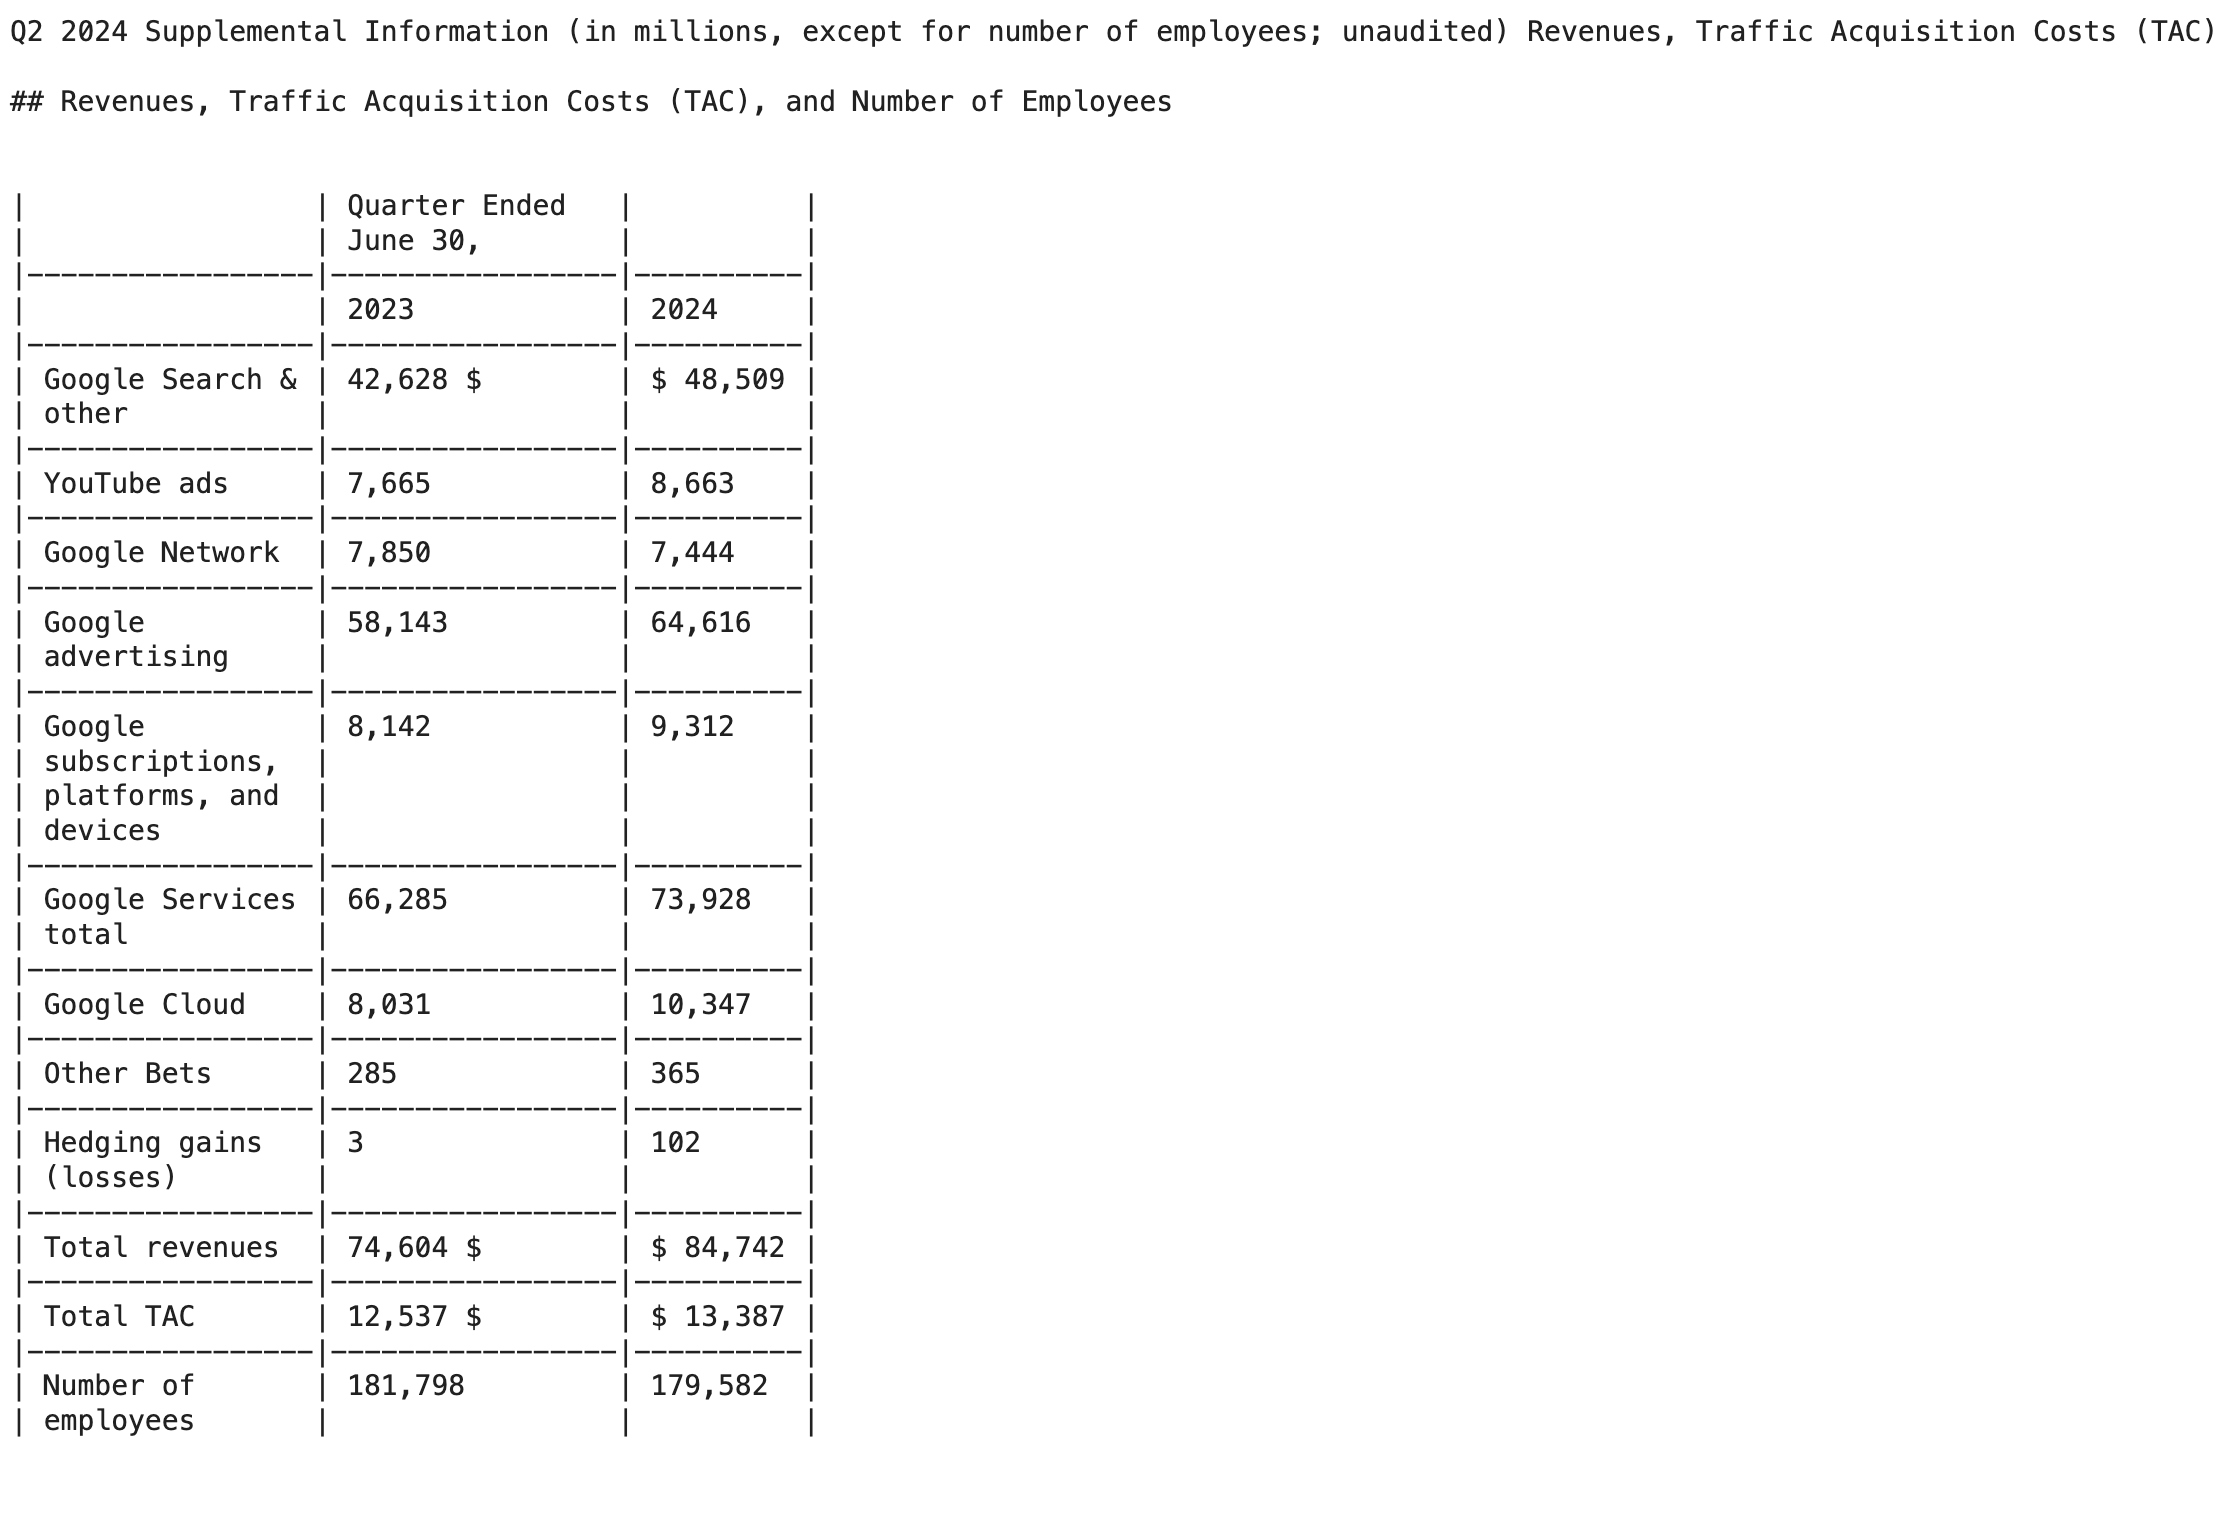

In [ ]:
reconstructed_document  = reconstruct_document(chunked_document)
processed_string = format_chunked_document(reconstructed_document)
print(processed_string)

## [Optional] Upload Chunks to GCS Bucket

Upload chunked document for offline review and edit.

You can always transform JSON to your preferred formats (e.g. CSV, XLSX) before exporting.

In [ ]:
def upload_json_to_gcs(bucket_name: str, file_name: str, json_data: Dict[str, Any] | List[Any]) -> None:
    """Uploads a JSON variable to a GCS bucket as a file.

    Args:
        bucket_name: The name of the GCS bucket (must start with 'gs://' and end with '/').
        file_name: The desired name of the JSON file within the bucket.
        json_data: The JSON data to be uploaded (Python dictionary or list).

    Raises:
        ValueError: If the bucket_name format is invalid.
    """

    if not bucket_name.startswith("gs://") or not bucket_name.endswith("/"):
        raise ValueError(
            "Invalid GCS path format. Must start with 'gs://' and end with '/'. "
            f"Received: '{bucket_name}'"
        )

    storage_client = storage.Client(project=PROJECT_ID)  # Assuming PROJECT_ID is defined

    parsed_path = urlparse(bucket_name)
    bucket_name = parsed_path.netloc

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(file_name)

    # Convert the JSON data to a string
    json_string = json.dumps(json_data,indent=2)

    # Upload the JSON string as the file contents
    blob.upload_from_string(json_string, content_type='application/json')

    print(f"JSON data uploaded to https://storage.mtls.cloud.google.com/{bucket_name}/{file_name}\n")

upload_json_to_gcs("gs://" + GCS_BUCKET + "/", FILE_NAME_VAIS_OUTPUT, chunked_document['jsonData'])


# STEP 4. [Needs Allowlisting] Bring Your Own Chunks (BYOC)

This section describes how to [bring your own chunks](https://cloud.google.com/generative-ai-app-builder/docs/parse-chunk-documents#bring-chunks) into VAIS.

The chunks can be completely generated by you, or you can take chunks generated by VAIS and modify them. Examples of the latter could be augmenting with additional context, or even batch processing to fix systematic issues with a certain document template like heading detection.

Note that chunks should comply with the token limit specified at the time of creating the Datastore.

At the time of publishing this notebook, the BYOC feature is available under private preview. To be allowlisted for this feature, please contact your Google account team.

## Function to import Chunks

In [ ]:
def upload_document_chunks(project_id: str, data_store_id: str, uri_path: str) -> None:
    """Uploads chunks of a document to a Vertex AI data store."""

    # Get authentication token using gcloud
    access_token = creds.token  # Use gcloud or service account

    base_url = "https://discoveryengine.googleapis.com/v1alpha"
    url = f"{base_url}/projects/{project_id}/locations/global/collections/default_collection/dataStores/{data_store_id}/branches/default_branch/documents:import"

    # Prepare the request payload
    header = {"Content-Type": "application/json"}
    payload = {
        "reconciliationMode": "INCREMENTAL",
        "gcsSource": {"inputUris": uri_path,
                      "dataSchema": "content"},
    }

    response = authed_session.post(url=url,json=payload)

    if response.status_code == 200:
        print("Chunked file uploaded successfully!")
    else:
        print(f"Error uploading chunked file: {response.status_code}, {response.text}")



## Import Chunks

Define the file name with chunks to be imported and run the function to actually import it.

The formatting of the file should be same as `jsonData` field in the Chunked document.

For the sake of quick testing you use the exported chunked document here and reimport it into VAIS.

In [ ]:
FILE_NAME_TO_IMPORT = 'chunked_doc_to_import.json' # @param {type:"string"}
upload_document_chunks(PROJECT_ID, DATASTORE_ID,"gs://" + GCS_BUCKET + "/" + FILE_NAME_TO_IMPORT)

## Visually reviewing BYO Chunked document

Visually review to spot issues with the chunked document.

Helper functions defined earlier in this notebook are used here.

The chunks from JSON object are stacked together first, and beautified later for ease of human reviewing.



An example for a beautified bring your own chunked document

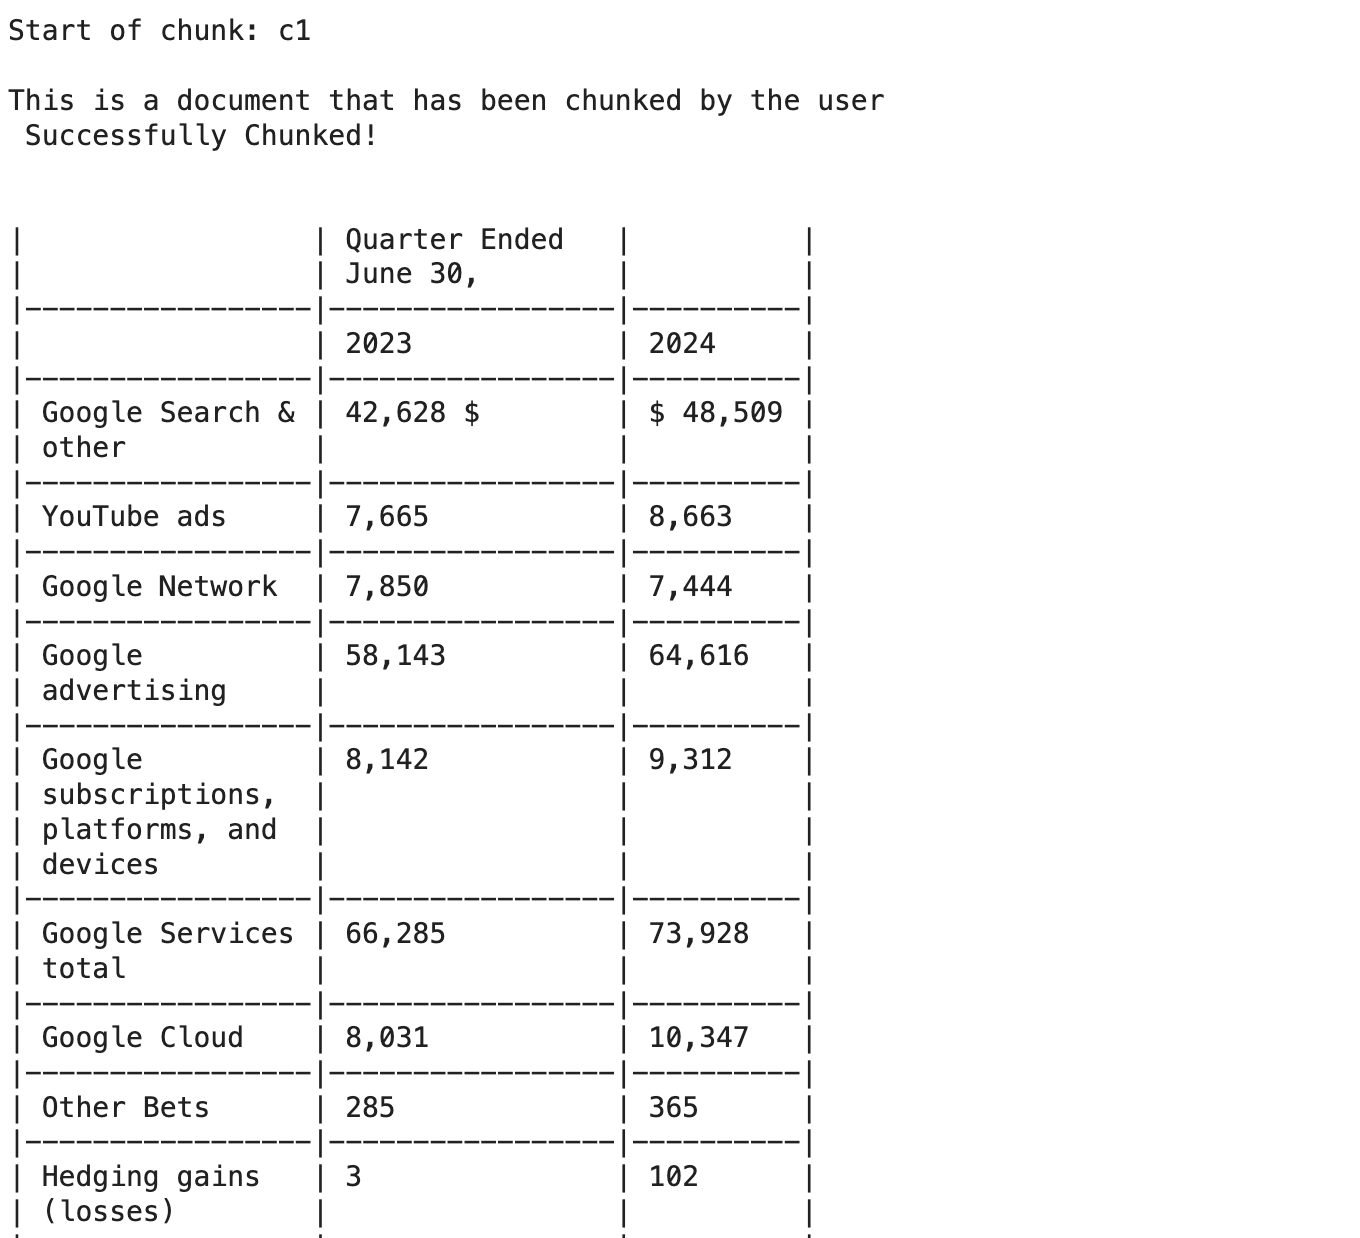

#Cleanup
Clean up resources created in this notebook.

Set `DELETE_RESOURCES` flag to `True` to delete resources.

In [ ]:
DELETE_RESOURCES = False

## Clean up GCS bucket

❗❗❗ Only run the below cells if you created a new bucket just for this notebook ❗❗❗


In [ ]:
def empty_bucket(bucket_name: str) -> None:
    """Deletes all objects in the specified GCS bucket."""
    client = storage.Client()
    bucket = client.get_bucket(bucket_name)

    blobs = bucket.list_blobs()  # List all blobs (objects)
    for blob in blobs:
        blob.delete()  # Delete each blob

    print(f"Bucket {bucket_name} emptied.")

In [ ]:
if DELETE_RESOURCES:
  ## Empty the bucket by deleting all files in it
  empty_bucket(GCS_BUCKET)

  ## Create a client object
  client = storage.Client(project=PROJECT_ID)

  ## Get the bucket object
  bucket = client.get_bucket(GCS_BUCKET)

  ## Delete the bucket
  bucket.delete()

  print(f"Bucket {GCS_BUCKET} deleted successfully.")

## Delete the Datastore
Delete the Datastore if you no longer need it

Alternatively you can follow [these instructions](https://console.cloud.google.com/gen-app-builder/data-stores) to delete a Datastore from the UI

In [ ]:
if DELETE_RESOURCES:
  response = authed_session.delete(
  f'https://discoveryengine.googleapis.com/v1alpha/projects/{PROJECT_ID}/locations/{LOCATION}/collections/default_collection/dataStores/{DATASTORE_ID}',
    headers={
      "X-Goog-User-Project": PROJECT_ID
    }
      )

  print(response.json())